In [ ]:
import pandas as pd # dataframes
import numpy as np # algebra & calculus

In [ ]:
import gc

In [ ]:
import gdown

# Define Google Drive file IDs and output file paths
file_ids = {
    'aisles.csv': '1IPk2FhGApCykt4dKz6CpEA1xZ1AX-4xP',
    'orders.csv': '1NnYBsxqLPnTe33ikpZ6awZcrnfm0Lrjl',
    'order_products__prior.csv': '1TvLrLc5JtrJvWK2Jn-YfBpUD09EheCBu',
    'order_products__train.csv': '1C50CFErCC5QGiLeg6FwQLE4EkF-Q9Rnd',
    'products.csv': '1hMlAq-b3gbpIFpjiY1k4aTnJAcHjeEDH',
    'departments.csv': '1J76eATzhPvbnEE236kb5_39_rs3kLTN5',
}

output_paths = {
    'aisles.csv' : 'aisles.csv',
    'orders.csv': 'orders.csv',
    'order_products__prior.csv': 'order_products__prior.csv',
    'order_products__train.csv': 'order_products__train.csv',
    'products.csv': 'products.csv',
    'departments.csv': 'departments.csv',
}

# Download files from Google Drive
for filename, file_id in file_ids.items():
    output_path = output_paths[filename]
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Read the downloaded CSV files into Pandas DataFrames
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
# Now you can use the DataFrames as needed


Downloading...
From: https://drive.google.com/uc?id=1IPk2FhGApCykt4dKz6CpEA1xZ1AX-4xP
To: /content/aisles.csv
100%|██████████| 2.60k/2.60k [00:00<00:00, 7.84MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NnYBsxqLPnTe33ikpZ6awZcrnfm0Lrjl
To: /content/orders.csv
100%|██████████| 109M/109M [00:03<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TvLrLc5JtrJvWK2Jn-YfBpUD09EheCBu
To: /content/order_products__prior.csv
100%|██████████| 578M/578M [00:08<00:00, 67.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C50CFErCC5QGiLeg6FwQLE4EkF-Q9Rnd
To: /content/order_products__train.csv
100%|██████████| 24.7M/24.7M [00:00<00:00, 45.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hMlAq-b3gbpIFpjiY1k4aTnJAcHjeEDH
To: /content/products.csv
100%|██████████| 2.17M/2.17M [00:00<00:00, 56.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J76eATzhPvbnEE236kb5_39_rs3kLTN5
To: /content/departments.csv
100%|██████████| 270/270 [00:00<00:00, 878

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
gc.collect()

0

In [ ]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
gc.collect()

0

In [ ]:
#ordered_products = orders + order_products_prior
order_product = orders.merge(order_products_prior, on = 'order_id', how = 'inner')

In [ ]:
order_product.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [ ]:
gc.collect()

0

In [ ]:
# Define a dictionary to map order_dow values to day names
day_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Use the map function to create a new column 'day_name' based on 'order_dow'
order_product['day_name'] = order_product['order_dow'].map(day_names)

# Display the resulting DataFrame
order_product.head(5)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,day_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,Tuesday
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Tuesday
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Tuesday
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Tuesday
4,2539329,1,prior,1,2,8,NaN,26405,5,0,Tuesday


# 1. Number of orders per day of the week

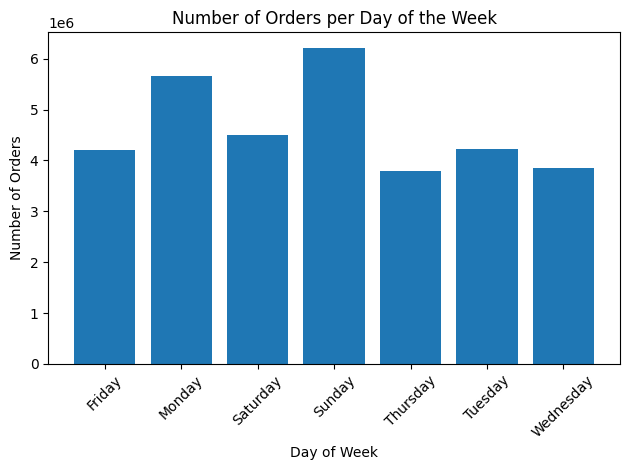

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

orders_per_dow = order_product.groupby('day_name')['order_id'].count().reset_index()

# Renaming the count column to 'num_orders'
orders_per_dow.rename(columns={'order_id': 'num_orders'}, inplace=True)

# Sorting the DataFrame by 'day_name'
orders_per_dow = orders_per_dow.sort_values('day_name').reset_index(drop=True)

# Convert list of dictionaries to Pandas DataFrame
df = orders_per_dow

# Plotting using Pandas DataFrame
plt.bar(df['day_name'], df['num_orders'])
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Day of the Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

##2. Top 10 Products by Frequency Count

In [ ]:
df_order_products = order_products_prior.merge(products, how='left', on='product_id')
df_order_products = df_order_products.merge(aisles, on='aisle_id', how='left')
df_order_products = df_order_products.merge(orders, on='order_id', how='left')
df_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,205970,prior,16,5,17,12.0


In [ ]:
# Assuming you have a DataFrame called df_order_products
product_frequency_count = df_order_products.groupby('product_name').size().reset_index(name='count')

# Sort the products by frequency in descending order
product_frequency_count = product_frequency_count.sort_values(by='count', ascending=False)

# Show the top 10 products by frequency count
top_10_product_frequency_count = product_frequency_count.head(10)
top_10_product_frequency_count = top_10_product_frequency_count.rename(columns={'count': 'frequency_count'})

top_10_product_frequency_count.head(10)

,product_name,frequency_count
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584
28804,Organic Avocado,176815
22413,Large Lemon,152657
42904,Strawberries,142951
23420,Limes,140627
32478,Organic Whole Milk,137905


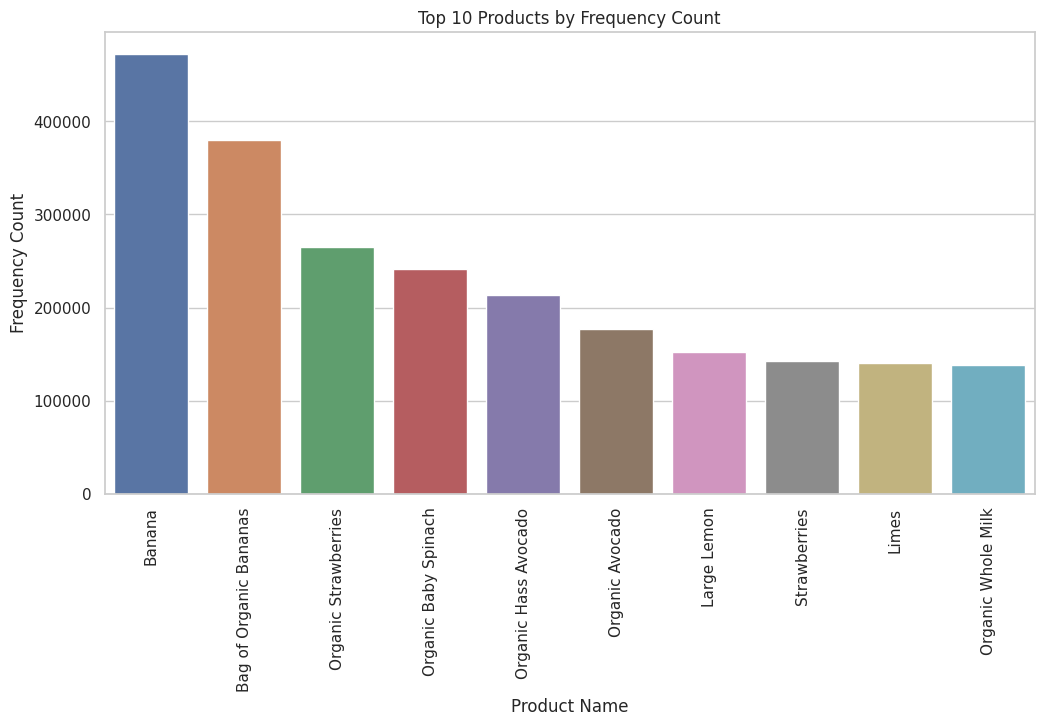

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_product_frequency_count, x='product_name', y='frequency_count')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Frequency Count')
plt.title('Top 10 Products by Frequency Count')

# Display the plot
plt.show()

## 3. Number of Unique Orders by Day of the week

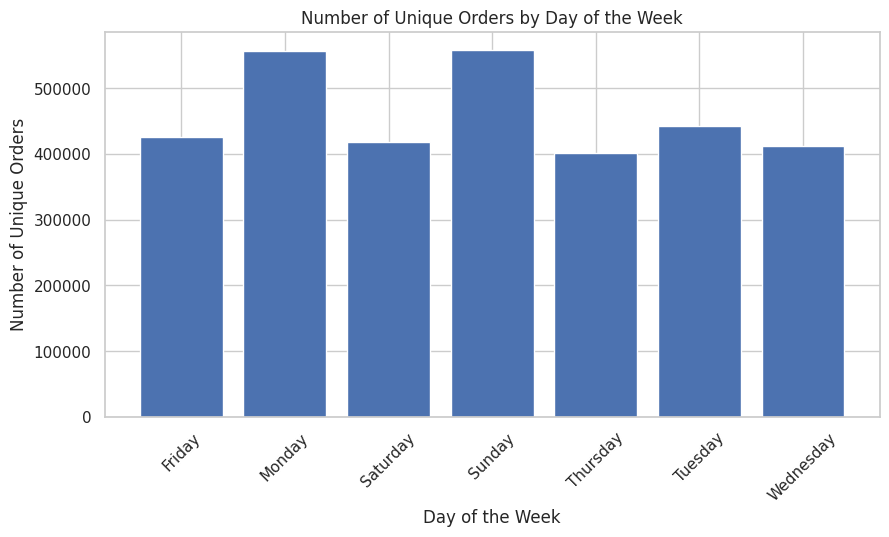

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate the number of unique orders for each day of the week
orders_per_day = order_product.groupby('day_name')['order_id'].nunique().reset_index(name='unique_orders')

# Sort the data by day of the week
orders_per_day = orders_per_day.sort_values(by='day_name')

# Create a histogram
plt.figure(figsize=(10, 5))
plt.bar(orders_per_day['day_name'], orders_per_day['unique_orders'])
plt.title('Number of Unique Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45)
plt.show()

##4. Busiest Days of the Week

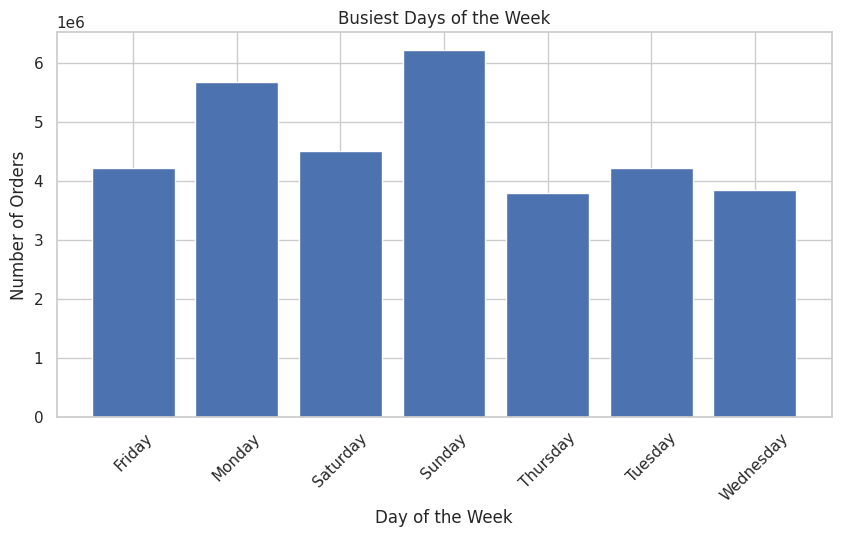

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate the number of orders for each day of the week
orders_per_day = order_product.groupby('day_name')['order_id'].count().reset_index(name='order_count')

# Sort the data by day of the week
orders_per_day = orders_per_day.sort_values(by='day_name')

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(orders_per_day['day_name'], orders_per_day['order_count'])
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

##5. Order distribution across the day


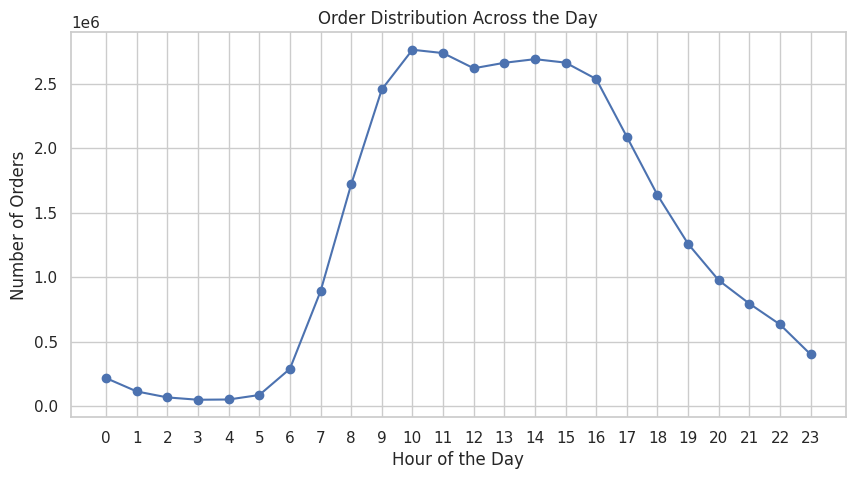

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate the number of orders for each hour of the day
orders_per_hour = order_product.groupby('order_hour_of_day')['order_id'].count().reset_index(name='order_count')

# Sort the data by hour of the day
orders_per_hour = orders_per_hour.sort_values(by='order_hour_of_day')

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(orders_per_hour['order_hour_of_day'], orders_per_hour['order_count'], marker='o')
plt.title('Order Distribution Across the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(True)
plt.show()

##6. Reordered vs Not Reordered Products

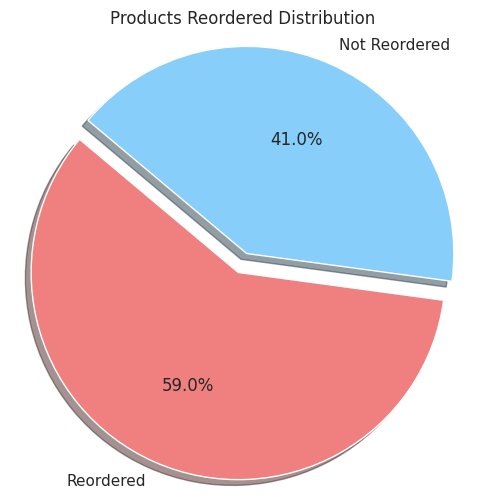

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate the count of products that are reordered and not reordered
reordered_count = order_product[order_product['reordered'] == 1].shape[0]
not_reordered_count = order_product[df_order_products['reordered'] == 0].shape[0]

# Create a pie chart
labels = 'Reordered', 'Not Reordered'
sizes = [reordered_count, not_reordered_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Reordered)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Products Reordered Distribution')
plt.show()

##7.Percentage of Users Who Reorder vs. Those Who Do Not Reorder

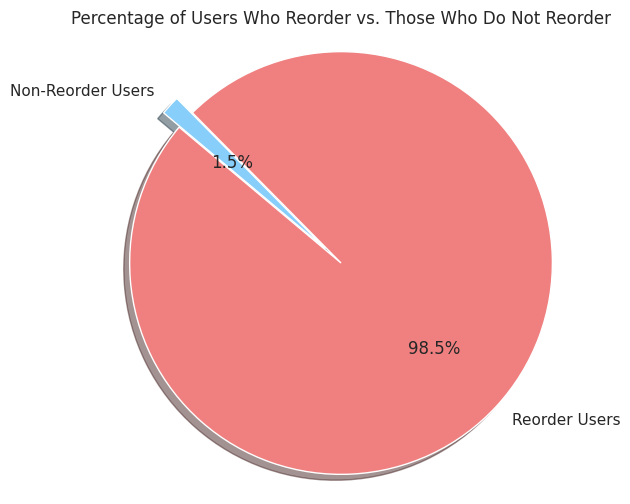

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate the percentage of users who reorder and who do not reorder
total_users = order_product['user_id'].nunique()
reordered_users = order_product[order_product['reordered'] == 1]['user_id'].nunique()
not_reordered_users = total_users - reordered_users

# Create a pie chart
labels = 'Reorder Users', 'Non-Reorder Users'
sizes = [reordered_users, not_reordered_users]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Reorder Users)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Users Who Reorder vs. Those Who Do Not Reorder')
plt.show()

In [ ]:
order_product

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,day_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,Tuesday
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Tuesday
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Tuesday
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Tuesday
4,2539329,1,prior,1,2,8,NaN,26405,5,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1,Monday
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0,Monday
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0,Monday
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0,Monday


##8. Top Products Added to Cart and Reordered

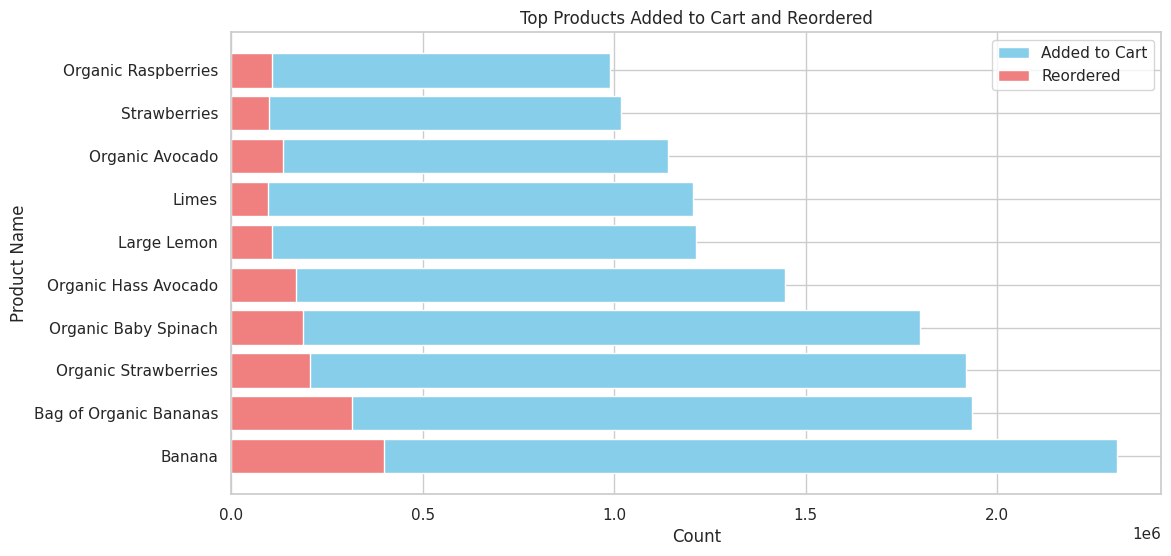

In [ ]:
# Assuming you have a DataFrame called df_order_products
# Calculate product statistics
product_stats = df_order_products.groupby(["product_id", "product_name"]).agg(
    {'add_to_cart_order': 'sum', 'reordered': 'sum'}
).reset_index().rename(columns={'add_to_cart_order': 'total_added_to_cart', 'reordered': 'total_reordered'})

# Select the top N products based on the most added to cart and reordered
top_products = product_stats.sort_values(by=['total_added_to_cart', 'total_reordered'], ascending=[False, False]).head(10)

# Create a bar plot to visualize the top products
plt.figure(figsize=(12, 6))
plt.barh(top_products['product_name'], top_products['total_added_to_cart'], color='skyblue', label='Added to Cart')
plt.barh(top_products['product_name'], top_products['total_reordered'], color='lightcoral', label='Reordered')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top Products Added to Cart and Reordered')
plt.legend()
plt.show()

# Product

## Extract Product Features

## 1. Count how many time one product had been purchased



In [ ]:
p_total_purchases = order_product.groupby('product_id')['order_id'].count().to_frame('p_total_purchases').reset_index()
p_total_purchases.head()

,product_id,p_total_purchases
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


## 2. Calculating the ratio of reordered of a product

In [ ]:
p_reorder_ratio = order_product.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio').reset_index()
p_reorder_ratio.head()

,product_id,p_reorder_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000


In [ ]:
gc.collect()

15572

In [ ]:
# merge the product and the reordered ratio
prd = p_total_purchases.merge(p_reorder_ratio, on = 'product_id', how='inner')
del p_reorder_ratio
gc.collect()
prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.600000


In [ ]:
gc.collect()

0

# USER

### Extract user feature when purchasing products like behavior, favourite products, etc.

# 1. Calculating the number of order
### Max order_number is also knowed as total order

In [ ]:
user_total_orders = order_product.groupby('user_id')['order_number'].max().to_frame('user_total_orders').reset_index()
user_total_orders.head()

,user_id,user_total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


# 2. Calculating the ratio of reorder products of a person

In [ ]:
gc.collect()

0

In [ ]:
user_reordered = order_product.groupby('user_id')['reordered'].mean().to_frame('user_reordered_ratio').reset_index()
user_reordered.head()

,user_id,user_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [ ]:
user = user_total_orders.merge(user_reordered, on = 'user_id', how = 'left')
del user_reordered
gc.collect()
user.head()

,user_id,user_total_orders,user_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [ ]:
gc.collect()

0

# User x Product

---



# 1. Calculate how many times a user orders a specific product

In [ ]:
user_product_total = order_product.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('user_product_total').reset_index()
user_product_total.head()

,user_id,product_id,user_product_total
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [ ]:
first_order = order_product.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number').reset_index()
first_order.head(10)

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2
5,1,13176,2
6,1,14084,1
7,1,17122,5
8,1,25133,3
9,1,26088,1


In [ ]:
gc.collect()

0

In [ ]:
span = pd.merge(user_total_orders, first_order, on='user_id', how = 'right')
span.head()

,user_id,user_total_orders,product_id,first_order_number
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [ ]:
gc.collect()

0

In [ ]:
span['order_range'] = span.user_total_orders.astype('int8') - span.first_order_number.astype('int8') + 1
del user_total_orders
del first_order
gc.collect()
span.head()

,user_id,user_total_orders,product_id,first_order_number,order_range
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


## Calculating User Reorder Ratio of each Product

---



---



In [ ]:
gc.collect()

0

In [ ]:
user_product_reorder_ratio = pd.merge(span, user_product_total, on = ['user_id','product_id'], how = 'left')
user_product_reorder_ratio.head()

,user_id,user_total_orders,product_id,first_order_number,order_range,user_product_total
0,1,10,196,1,10,10
1,1,10,10258,2,9,9
2,1,10,10326,5,6,1
3,1,10,12427,1,10,10
4,1,10,13032,2,9,3


In [ ]:
user_product_reorder_ratio['reorder_ratio'] = user_product_reorder_ratio['user_product_total']/user_product_reorder_ratio['order_range']
user_product_reorder_ratio.head()

,user_id,user_total_orders,product_id,first_order_number,order_range,user_product_total,reorder_ratio
0,1,10,196,1,10,10,1.000000
1,1,10,10258,2,9,9,1.000000
2,1,10,10326,5,6,1,0.166667
3,1,10,12427,1,10,10,1.000000
4,1,10,13032,2,9,3,0.333333


In [ ]:
gc.collect()

0

In [ ]:
u_p_rate = user_product_reorder_ratio[['user_id', 'product_id', 'reorder_ratio']]
u_p_rate.head()

,user_id,product_id,reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [ ]:
u_p = u_p_rate.merge(user_product_total, on = ['user_id', 'product_id'], how='left')
u_p.head()

,user_id,product_id,reorder_ratio,user_product_total
0,1,196,1.000000,10
1,1,10258,1.000000,9
2,1,10326,0.166667,1
3,1,12427,1.000000,10
4,1,13032,0.333333,3


In [ ]:
del u_p_rate
gc.collect()

0

# -------------------------------

In [ ]:
data = u_p.merge(user, on='user_id', how = 'left')
data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio
0,1,196,1.000000,10,10,0.694915
1,1,10258,1.000000,9,10,0.694915
2,1,10326,0.166667,1,10,0.694915
3,1,12427,1.000000,10,10,0.694915
4,1,13032,0.333333,3,10,0.694915


In [ ]:
user_product_total.head()

,user_id,product_id,user_product_total
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [ ]:
gc.collect()

0

In [ ]:
prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.600000


In [ ]:
data = data.merge(prd, on = 'product_id', how ='left')
data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio
0,1,196,1.000000,10,10,0.694915,35791,0.776480
1,1,10258,1.000000,9,10,0.694915,1946,0.713772
2,1,10326,0.166667,1,10,0.694915,5526,0.652009
3,1,12427,1.000000,10,10,0.694915,6476,0.740735
4,1,13032,0.333333,3,10,0.694915,3751,0.657158


In [ ]:
del prd, user_product_total, u_p
gc.collect()

0

# Train/Test Data

In [ ]:
order_train_test = orders[(orders['eval_set']=='train')|(orders['eval_set']=='test')]
order_train_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
49,2196797,5,train,5,0,11,6.0


In [ ]:
order_train_test = order_train_test[['order_id', 'user_id', 'eval_set']]
order_train_test.head()

,order_id,user_id,eval_set
10,1187899,1,train
25,1492625,2,train
38,2774568,3,test
44,329954,4,test
49,2196797,5,train


In [ ]:
gc.collect()

0

In [ ]:
data = data.merge(order_train_test, on = ['user_id'], how = 'left')
data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set
0,1,196,1.000000,10,10,0.694915,35791,0.776480,1187899,train
1,1,10258,1.000000,9,10,0.694915,1946,0.713772,1187899,train
2,1,10326,0.166667,1,10,0.694915,5526,0.652009,1187899,train
3,1,12427,1.000000,10,10,0.694915,6476,0.740735,1187899,train
4,1,13032,0.333333,3,10,0.694915,3751,0.657158,1187899,train


In [ ]:
training_data = data[data['eval_set'] == 'train']
training_data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set
0,1,196,1.000000,10,10,0.694915,35791,0.776480,1187899,train
1,1,10258,1.000000,9,10,0.694915,1946,0.713772,1187899,train
2,1,10326,0.166667,1,10,0.694915,5526,0.652009,1187899,train
3,1,12427,1.000000,10,10,0.694915,6476,0.740735,1187899,train
4,1,13032,0.333333,3,10,0.694915,3751,0.657158,1187899,train


In [ ]:
gc.collect()

0

In [ ]:
training_data = training_data.merge(order_products_train[['product_id', 'order_id', 'reordered']] , on = ['order_id', 'product_id'], how = 'left')
training_data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set,reordered
0,1,196,1.000000,10,10,0.694915,35791,0.776480,1187899,train,1.0
1,1,10258,1.000000,9,10,0.694915,1946,0.713772,1187899,train,1.0
2,1,10326,0.166667,1,10,0.694915,5526,0.652009,1187899,train,NaN
3,1,12427,1.000000,10,10,0.694915,6476,0.740735,1187899,train,NaN
4,1,13032,0.333333,3,10,0.694915,3751,0.657158,1187899,train,1.0


In [ ]:
# fill NaN value to 0
training_data['reordered'] = training_data['reordered'].fillna(0)
training_data.head(15)

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set,reordered
0,1,196,1.000000,10,10,0.694915,35791,0.776480,1187899,train,1.0
1,1,10258,1.000000,9,10,0.694915,1946,0.713772,1187899,train,1.0
2,1,10326,0.166667,1,10,0.694915,5526,0.652009,1187899,train,0.0
3,1,12427,1.000000,10,10,0.694915,6476,0.740735,1187899,train,0.0
4,1,13032,0.333333,3,10,0.694915,3751,0.657158,1187899,train,1.0
5,1,13176,0.222222,2,10,0.694915,379450,0.832555,1187899,train,0.0
6,1,14084,0.100000,1,10,0.694915,15935,0.810982,1187899,train,0.0
7,1,17122,0.166667,1,10,0.694915,13880,0.675576,1187899,train,0.0
8,1,25133,1.000000,8,10,0.694915,6196,0.740155,1187899,train,1.0
9,1,26088,0.200000,2,10,0.694915,2523,0.539041,1187899,train,1.0


In [ ]:
gc.collect()

17

In [ ]:
training_data = training_data.drop(['order_id', 'eval_set'], axis =1)
training_data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,reordered
0,1,196,1.000000,10,10,0.694915,35791,0.776480,1.0
1,1,10258,1.000000,9,10,0.694915,1946,0.713772,1.0
2,1,10326,0.166667,1,10,0.694915,5526,0.652009,0.0
3,1,12427,1.000000,10,10,0.694915,6476,0.740735,0.0
4,1,13032,0.333333,3,10,0.694915,3751,0.657158,1.0


In [ ]:
training_data = training_data.set_index(['user_id', 'product_id'])
training_data.head()

reorder_ratio  user_product_total  user_total_orders  \
user_id product_id                                                         
1       196              1.000000                  10                 10   
        10258            1.000000                   9                 10   
        10326            0.166667                   1                 10   
        12427            1.000000                  10                 10   
        13032            0.333333                   3                 10   

                    user_reordered_ratio  p_total_purchases  p_reorder_ratio  \
user_id product_id                                                             
1       196                     0.694915              35791         0.776480   
        10258                   0.694915               1946         0.713772   
        10326                   0.694915               5526         0.652009   
        12427                   0.694915               6476         0.740735   
        13032                   0.694915               3751         0.657158   

                    reordered  
user_id product_id             
1       196               1.0  
        10258             1.0  
        10326             0.0  
        12427             0.0  
        13032             1.0

In [ ]:
gc.collect()

0

In [ ]:
testing_data = data[data.eval_set=='test']
testing_data.head()

,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio,order_id,eval_set
120,3,248,0.090909,1,12,0.625,6371,0.400251,2774568,test
121,3,1005,0.333333,1,12,0.625,463,0.440605,2774568,test
122,3,1819,0.333333,3,12,0.625,2424,0.492162,2774568,test
123,3,7503,0.100000,1,12,0.625,12474,0.553551,2774568,test
124,3,8021,0.090909,1,12,0.625,27864,0.591157,2774568,test


In [ ]:
testing_data.drop(['eval_set', 'order_id'], axis = 1, inplace =True)
testing_data.head()

<ipython-input-69-ad15d9207b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.drop(['eval_set', 'order_id'], axis = 1, inplace =True)


,user_id,product_id,reorder_ratio,user_product_total,user_total_orders,user_reordered_ratio,p_total_purchases,p_reorder_ratio
120,3,248,0.090909,1,12,0.625,6371,0.400251
121,3,1005,0.333333,1,12,0.625,463,0.440605
122,3,1819,0.333333,3,12,0.625,2424,0.492162
123,3,7503,0.100000,1,12,0.625,12474,0.553551
124,3,8021,0.090909,1,12,0.625,27864,0.591157


In [ ]:
gc.collect()

0

In [ ]:
testing_data = testing_data.set_index(['user_id', 'product_id'])
testing_data.head()

reorder_ratio  user_product_total  user_total_orders  \
user_id product_id                                                         
3       248              0.090909                   1                 12   
        1005             0.333333                   1                 12   
        1819             0.333333                   3                 12   
        7503             0.100000                   1                 12   
        8021             0.090909                   1                 12   

                    user_reordered_ratio  p_total_purchases  p_reorder_ratio  
user_id product_id                                                            
3       248                        0.625               6371         0.400251  
        1005                       0.625                463         0.440605  
        1819                       0.625               2424         0.492162  
        7503                       0.625              12474         0.553551  
        8021                       0.625              27864         0.591157

In [ ]:
gc.collect()

0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = training_data
X.head()

reorder_ratio  user_product_total  user_total_orders  \
user_id product_id                                                         
1       196              1.000000                  10                 10   
        10258            1.000000                   9                 10   
        10326            0.166667                   1                 10   
        12427            1.000000                  10                 10   
        13032            0.333333                   3                 10   

                    user_reordered_ratio  p_total_purchases  p_reorder_ratio  \
user_id product_id                                                             
1       196                     0.694915              35791         0.776480   
        10258                   0.694915               1946         0.713772   
        10326                   0.694915               5526         0.652009   
        12427                   0.694915               6476         0.740735   
        13032                   0.694915               3751         0.657158   

                    reordered  
user_id product_id             
1       196               1.0  
        10258             1.0  
        10326             0.0  
        12427             0.0  
        13032             1.0

In [ ]:
gc.collect()

0

In [ ]:
X_test = testing_data
X_test.head()

reorder_ratio  user_product_total  user_total_orders  \
user_id product_id                                                         
3       248              0.090909                   1                 12   
        1005             0.333333                   1                 12   
        1819             0.333333                   3                 12   
        7503             0.100000                   1                 12   
        8021             0.090909                   1                 12   

                    user_reordered_ratio  p_total_purchases  p_reorder_ratio  
user_id product_id                                                            
3       248                        0.625               6371         0.400251  
        1005                       0.625                463         0.440605  
        1819                       0.625               2424         0.492162  
        7503                       0.625              12474         0.553551  
        8021                       0.625              27864         0.591157

In [ ]:
y = X['reordered']
y.head()

user_id  product_id
1        196           1.0
         10258         1.0
         10326         0.0
         12427         0.0
         13032         1.0
Name: reordered, dtype: float64

In [ ]:
gc.collect()

0

In [ ]:
X = X.drop('reordered', axis = 1)
X.head()

reorder_ratio  user_product_total  user_total_orders  \
user_id product_id                                                         
1       196              1.000000                  10                 10   
        10258            1.000000                   9                 10   
        10326            0.166667                   1                 10   
        12427            1.000000                  10                 10   
        13032            0.333333                   3                 10   

                    user_reordered_ratio  p_total_purchases  p_reorder_ratio  
user_id product_id                                                            
1       196                     0.694915              35791         0.776480  
        10258                   0.694915               1946         0.713772  
        10326                   0.694915               5526         0.652009  
        12427                   0.694915               6476         0.740735  
        13032                   0.694915               3751         0.657158

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size =0.8, test_size =0.2, random_state = 0)

In [ ]:
gc.collect()

0

##XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

model = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=0)
model.fit(X_train, y_train)

# Predict on the validation set
preds_val = model.predict(X_val)

# Convert predictions to binary class labels using a threshold (adjust threshold as needed)
threshold = 0.5
preds_val_binary = (preds_val > threshold).astype(int)

# Calculate Precision, Recall, F1-score, AUC-ROC, and Accuracy for validation set
precision_val = precision_score(y_val, preds_val_binary)
recall_val = recall_score(y_val, preds_val_binary)
f1_val = f1_score(y_val, preds_val_binary)
auc_roc_val = roc_auc_score(y_val, preds_val)
accuracy_val = accuracy_score(y_val, preds_val_binary)

print(f"Precision for XGBoost on validation set: {precision_val}")
print(f"Recall for XGBoost on validation set: {recall_val}")
print(f"F1-score for XGBoost on validation set: {f1_val}")
print(f"AUC-ROC for XGBoost on validation set: {auc_roc_val}")
print(f"Accuracy for XGBoost on validation set: {accuracy_val}")

# Predict on the test set
preds_test = model.predict(X_test)
preds_test_binary = (preds_test > threshold).astype(int)

Precision for XGBoost on validation set: 0.8096
Recall for XGBoost on validation set: 0.018310776579575885
F1-score for XGBoost on validation set: 0.03581159984429739
AUC-ROC for XGBoost on validation set: 0.8176439958534081
Accuracy for XGBoost on validation set: 0.9035466298667852


In [ ]:
gc.collect()

13

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Creating the Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Making predictions on the validation set
preds_nb_val = nb_model.predict(X_val)

# Convert predictions to binary class labels using a threshold (adjust threshold as needed)
threshold = 0.5
preds_nb_val_binary = (preds_nb_val > threshold).astype(int)

# Calculate F1-score, AUC-ROC, and accuracy for validation set
precision_nb_val = precision_score(y_val, preds_nb_val_binary)
recall_nb_val = recall_score(y_val, preds_nb_val_binary)
f1_nb_val = f1_score(y_val, preds_nb_val_binary)
auc_roc_nb_val = roc_auc_score(y_val, preds_nb_val)
accuracy_nb_val = accuracy_score(y_val, preds_nb_val_binary)

print(f"Precision for Naive Bayes on validation set: {precision_nb_val}")
print(f"Recall for Naive Bayes on validation set: {recall_nb_val}")
print(f"F1-score for Naive Bayes on validation set: {f1_nb_val}")
print(f"AUC-ROC for Naive Bayes on validation set: {auc_roc_nb_val}")
print(f"Accuracy for Naive Bayes on validation set: {accuracy_nb_val}")

# Making predictions on the test set
preds_nb_test = nb_model.predict(X_test)
preds_nb_test_binary = (preds_nb_test > threshold).astype(int)

Precision on validation set: 0.341534612176814
Recall on validation set: 0.16300571759426793
F1-score for Naive Bayes on validation set: 0.22068441809764106
AUC-ROC for Naive Bayes on validation set: 0.5644647279396328
Accuracy for Naive Bayes on validation set: 0.8873796191353877


##K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creating the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the model
knn_model.fit(X_train, y_train)

# Making predictions on the validation set
preds_knn_val = knn_model.predict(X_val)

# Convert predictions to binary class labels using a threshold (adjust threshold as needed)
threshold = 0.5
preds_knn_val_binary = (preds_knn_val > threshold).astype(int)

# Calculate F1-score, AUC-ROC, and accuracy for validation set
precision_knn_val = precision_score(y_val, preds_knn_val_binary)
recall_knn_val = recall_score(y_val, preds_knn_val_binary)
f1_knn_val = f1_score(y_val, preds_knn_val_binary)
auc_roc_knn_val = roc_auc_score(y_val, preds_knn_val)
accuracy_knn_val = accuracy_score(y_val, preds_knn_val_binary)

print(f"Precision for K-Nearest Neighbors on validation set: {precision_knn_val}")
print(f"Recall for K-Nearest Neighbors on validation set: {recall_knn_val}")
print(f"F1-score for K-Nearest Neighbors on validation set: {f1_knn_val}")
print(f"AUC-ROC for K-Nearest Neighbors on validation set: {auc_roc_knn_val}")
print(f"Accuracy for K-Nearest Neighbors on validation set: {accuracy_knn_val}")

# Making predictions on the test set
preds_knn_test = knn_model.predict(X_test)
preds_knn_test_binary = (preds_knn_test > threshold).astype(int)

Precision for K-Nearest Neighbors on validation set: 0.4356886739695385
Recall for K-Nearest Neighbors on validation set: 0.15976092253504137
F1-score for K-Nearest Neighbors on validation set: 0.23379317040449776
AUC-ROC for K-Nearest Neighbors on validation set: 0.6896804274682701
Accuracy for K-Nearest Neighbors on validation set: 0.8975629125163059


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the Logistic Regression model
logreg_model = LogisticRegression()

# Training the model
logreg_model.fit(X_train, y_train)

# Making predictions on the validation set
preds_logreg_val = logreg_model.predict(X_val)

# Predict probabilities for class 1 (positive class) for AUC-ROC calculation
probs_logreg_val = logreg_model.predict_proba(X_val)[:, 1]

# Convert predictions to binary class labels using a threshold (adjust threshold as needed)
threshold = 0.5
preds_logreg_val_binary = (preds_logreg_val > threshold).astype(int)

# Calculate F1-score, AUC-ROC, and accuracy for validation set
precision_logreg_val = precision_score(y_val, preds_logreg_val_binary)
recall_logreg_val = recall_score(y_val, preds_logreg_val_binary)
f1_logreg_val = f1_score(y_val, preds_logreg_val_binary)
auc_roc_logreg_val = roc_auc_score(y_val, probs_logreg_val)
accuracy_logreg_val = accuracy_score(y_val, preds_logreg_val_binary)

print(f"Precision for Logistic Regression on validation set: {precision_logreg_val}")
print(f"Recall for Logistic Regression on validation set: {recall_logreg_val}")
print(f"F1-score for Logistic Regression on validation set: {f1_logreg_val}")
print(f"AUC-ROC for Logistic Regression on validation set: {auc_roc_logreg_val}")
print(f"Accuracy for Logistic Regression on validation set: {accuracy_logreg_val}")

# Making predictions on the test set
preds_logreg_test = logreg_model.predict(X_test)
probs_logreg_test = logreg_model.predict_proba(X_test)[:, 1]
preds_logreg_test_binary = (preds_logreg_test > threshold).astype(int)

Precision for Logistic Regression on validation set: 0.5547031354236157
Recall for Logistic Regression on validation set: 0.1504487225881161
F1-score for Logistic Regression on validation set: 0.23669902359873612
AUC-ROC for Logistic Regression on validation set: 0.7063565671553255
Accuracy for Logistic Regression on validation set: 0.9050794338183279
